In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from pylorentz import Momentum4
import itertools

from matplotlib import pyplot as plt

top_mass = 173000

In [2]:
y_vars = ['y1_pt', 'y1_eta', 'y1_phi', 'y1_E', 'y2_pt', 'y2_eta', 'y2_phi', 'y2_E']
jet_vars = ['jet%d_pt','jet%d_eta','jet%d_phi', 'jet%d_E','jet%d_DLR1'] 
labels = []
for x in range(0,4):
    for var in jet_vars:
        labels.append(var %x)
labels = y_vars + labels

In [3]:
signal = pd.read_csv('signal_filtered.csv')
bkgd = pd.read_csv('background_filtered.csv')

In [4]:
top1_masses_signal = []
top2_masses_signal = []
cat_signal = np.zeros(len(signal))
myy_signal = []

In [5]:
signal_extended = signal.copy()
bkgd_extended = bkgd.copy()

In [6]:
for i, row in signal_extended.iterrows():
    jets = []

    photon1 = Momentum4.e_eta_phi_pt(row["y1_E"], row["y1_eta"], row["y1_phi"], row["y1_pt"])
    photon2 = Momentum4.e_eta_phi_pt(row["y2_E"], row["y2_eta"], row["y2_phi"], row["y2_pt"])

    yy = photon1 + photon2
    myy_signal.append(yy.m)
    for j in range(0, 4):
        jets.append([row['jet%d_pt' %j], row['jet%d_eta' %j], row['jet%d_phi' %j], row['jet%d_E' %j], row['jet%d_DLR1' %j], j])

    jets_momenta = [Momentum4.e_eta_phi_pt(jet[3], jet[1], jet[2], jet[0]) for jet in jets]

    top1s = [momentum + yy for momentum in jets_momenta]

    #add top1 mass for plotting
    for item in top1s:
        top1_masses_signal.append(item.m)
    #select top1 mass within 
    for index in range(4):
        if(top1s[index].m > 152000 and top1s[index].m < 190000):
            remaining_jets = jets_momenta.copy()
            remaining_jets.pop(index)
            top2 = remaining_jets[0]+remaining_jets[1]+remaining_jets[2]
            top2_masses_signal.append(top2.m)
            if(top2.m > 120000 and top2.m < 220000):
                cat_signal[i] = 1
            else:
                cat_signal[i] = 2

    



In [7]:
signal_extended["category"] = [int(i) for i in cat_signal]
signal_extended["myy"] = myy_signal


In [8]:

myy_bkgd = []
top1_masses_bkgd = []
top2_masses_bkgd = []
cat_bkgd = np.zeros(len(bkgd))

In [9]:
for i, row in bkgd_extended.iterrows():
    jets = []

    photon1 = Momentum4.e_eta_phi_pt(row["y1_E"], row["y1_eta"], row["y1_phi"], row["y1_pt"])
    photon2 = Momentum4.e_eta_phi_pt(row["y2_E"], row["y2_eta"], row["y2_phi"], row["y2_pt"])

    yy = photon1 + photon2

    myy_bkgd.append(yy.m)

    for j in range(0, 4):
        jets.append([row['jet%d_pt' %j], row['jet%d_eta' %j], row['jet%d_phi' %j], row['jet%d_E' %j], row['jet%d_DLR1' %j], j])

    jets_momenta = [Momentum4.e_eta_phi_pt(jet[3], jet[1], jet[2], jet[0]) for jet in jets]

    top1s = [momentum + yy for momentum in jets_momenta]

    #add top1 mass for plotting
    for item in top1s:
        top1_masses_bkgd.append(item.m)
    #select top1 mass within 
    for index in range(4):
        if(top1s[index].m > 152000 and top1s[index].m < 190000):
            remaining_jets = jets_momenta.copy()
            remaining_jets.pop(index)
            top2 = remaining_jets[0]+remaining_jets[1]+remaining_jets[2]
            #add top2 mass for plotting
            top2_masses_bkgd.append(top2.m)
            if(top2.m > 120000 and top2.m < 220000):
                cat_bkgd[i] = 1
            else:
                cat_bkgd[i] = 2

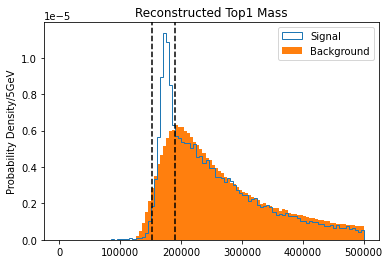

In [10]:
plt.hist(top1_masses_signal, 100, range = (0, 5e5), density= True, histtype='step', label="Signal")
plt.hist(top1_masses_bkgd, 100, range = (0, 5e5), density = True, label = "Background")
plt.axvline(152000, ymin = 0, ymax = 1.2, linestyle = '--', c = 'black')
plt.axvline(190000, ymin = 0, ymax = 1.2, linestyle = '--', c = 'black')
plt.legend()
plt.title("Reconstructed Top1 Mass")
plt.ylabel("Probability Density/5GeV")
plt.show()

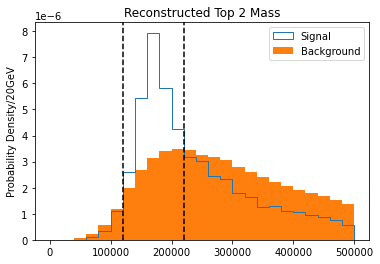

In [11]:
plt.hist(top2_masses_signal, 25, range = (0, 5e5), density= True, histtype='step', label="Signal")
plt.hist(top2_masses_bkgd, 25, range = (0, 5e5), density = True, label = "Background")
plt.axvline(120000, ymin = 0, ymax = 1.2, linestyle = '--', c = 'black')
plt.axvline(220000, ymin = 0, ymax = 1.2, linestyle = '--', c = 'black')
plt.title("Reconstructed Top 2 Mass")
plt.legend()
plt.ylabel("Probability Density/20GeV")
plt.show()

In [12]:
num_accepted_1 = np.count_nonzero(cat_signal == 1)
num_accepted_2 = np.count_nonzero(cat_signal == 2)

num_accepted_1_bkgd = np.count_nonzero(cat_bkgd == 1)
num_accepted_2_bkgd = np.count_nonzero(cat_bkgd == 2)

num_signal = len(signal)
num_signal_preselect = 50000
num_bkgd_preselect = 1780130

In [13]:
acceptance_1 = num_accepted_1/num_signal
acceptance_2 = num_accepted_2/num_signal

In [14]:
acceptance_2

0.4399954883825852

In [15]:
acceptance_1

0.27430633882246785

In [16]:
bkgd_extended["category"] = cat_bkgd
bkgd_extended["myy"] = myy_bkgd

In [17]:
signal_extended.to_csv("signal_cat.csv", index = False)

In [18]:
bkgd_extended.to_csv("background_cat.csv", index = False)

In [19]:
acceptance_1_presel = num_accepted_1/num_signal_preselect
acceptance_1_presel_bkgd = num_accepted_1_bkgd/num_bkgd_preselect

In [20]:
acceptance_2_presel = num_accepted_2/num_signal_preselect
acceptance_2_presel_bkgd = num_accepted_2_bkgd/num_bkgd_preselect

In [21]:
lumi=139
sigma=832.*1000
sigma_bkgd = 51.8*1000
AE_signal=0.0289
BR_Hyy = 0.0023
#BR_Whad = 0.676 --> for the arXiv paper already factored in AE factor
BR_Hc = 0.001
#factor 2 for t and tbar decay combination 
BR_tHc = 2.*BR_Hc

BR_hadron = 0.676


In [22]:
expected_sig_1 = lumi*sigma*BR_Hyy*BR_tHc*acceptance_1_presel*BR_hadron
expected_sig_2 = lumi*sigma*BR_Hyy*BR_tHc*acceptance_2_presel*BR_hadron

In [23]:
expected_bkgd_1 = lumi*sigma_bkgd*0.003656*acceptance_1_presel_bkgd
expected_bkgd_2 = lumi*sigma_bkgd*0.003656*acceptance_2_presel_bkgd

In [27]:
expected_sig_1

17.491869171712004

In [28]:
expected_sig_2

28.057476002816006